##BASIC

In [32]:

import numpy as np
import pandas as pd


In [33]:
! pip install -q kaggle kagglehub

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("claytonmiller/open-smart-home-iotieqenergy-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/claytonmiller/open-smart-home-iotieqenergy-data/versions/1


In [35]:
!ls $path/Measurements

Bathroom_Brightness.csv			 Room2_Humidity.csv
Bathroom_Humidity.csv			 Room2_OutdoorTemperature.csv
Bathroom_SetpointHistory.csv		 Room2_SetpointHistory.csv
Bathroom_Temperature.csv		 Room2_Temperature.csv
Bathroom_ThermostatTemperature.csv	 Room2_ThermostatTemperature.csv
Bathroom_Virtual_OutdoorTemperature.csv  Room3_Brightness.csv
Kitchen_Brightness.csv			 Room3_Humidity.csv
Kitchen_Humidity.csv			 Room3_left_ThermostatTemperature.csv
Kitchen_SetpointHistory.csv		 Room3_right_ThermostatTemperature.csv
Kitchen_Temperature.csv			 Room3_SetpointHistory.csv
Kitchen_ThermostatTemperature.csv	 Room3_Temperature.csv
Kitchen_Virtual_OutdoorTemperature.csv	 Room3_Virtual_OutdoorTemperature.csv
Room1_Brightness.csv			 Toilet_Brightness.csv
Room1_Humidity.csv			 Toilet_Humidity.csv
Room1_SetpointHistory.csv		 Toilet_SetpointHistory.csv
Room1_Temperature.csv			 Toilet_Temperature.csv
Room1_ThermostatTemperature.csv		 Toilet_ThermostatTemperature.csv
Room1_Virtual_OutdoorTemperature.csv	 Toilet_

In [36]:
df1 = pd.read_csv(path+'/Measurements/Room1_Brightness.csv',delimiter='\t',names=['DateTime','Luminance in lux'])
df2 = pd.read_csv(path+'/Measurements/Room1_Humidity.csv',delimiter='\t',names=['DateTime','relative Humidity in %'])
df3 = pd.read_csv(path+'/Measurements/Room1_SetpointHistory.csv',delimiter='\t',names=['DateTime','setpoint for the room in degree Celsius'])
df4 = pd.read_csv(path+'/Measurements/Room1_Temperature.csv',delimiter='\t',names=['DateTime','indoor air temperature in degree celsius'])
df5 = pd.read_csv(path+'/Measurements/Room1_ThermostatTemperature.csv',delimiter='\t',names=['DateTime','Thermostat mounted to the radiator temperature in degree celsius'])
df1['DateTime'] = pd.to_datetime(df1['DateTime'], unit='s')
df2['DateTime'] = pd.to_datetime(df2['DateTime'], unit='s')
df3['DateTime'] = pd.to_datetime(df3['DateTime'], unit='s')
df4['DateTime'] = pd.to_datetime(df4['DateTime'], unit='s')
df5['DateTime'] = pd.to_datetime(df5['DateTime'], unit='s')
df1.head()


,DateTime,Luminance in lux
0,2017-03-09 06:22:50,1.83
1,2017-03-09 06:32:55,0.00
2,2017-03-09 06:43:00,0.92
3,2017-03-09 06:53:04,2.75
4,2017-03-09 07:03:10,5.49


In [37]:
df1.to_csv("/content/Brightness.csv")
df2.to_csv("/content/Humidity.csv")
df3.to_csv("/content/SetpointHistory.csv")
df4.to_csv("/content/Temperature.csv")
df5.to_csv("/content/ThermostatTemperature.csv")

In [38]:
df4.head()

,DateTime,indoor air temperature in degree celsius
0,2017-03-09 00:51:30,19.53
1,2017-03-09 03:32:04,19.37
2,2017-03-09 05:12:26,19.53
3,2017-03-09 05:22:30,20.00
4,2017-03-09 05:32:33,20.31



Analyzing Brightness:
--------------------
mean: 49.50
std: 110.63
min: 0.00
max: 1312.91
missing_values: 0.00
total_readings: 11038.00


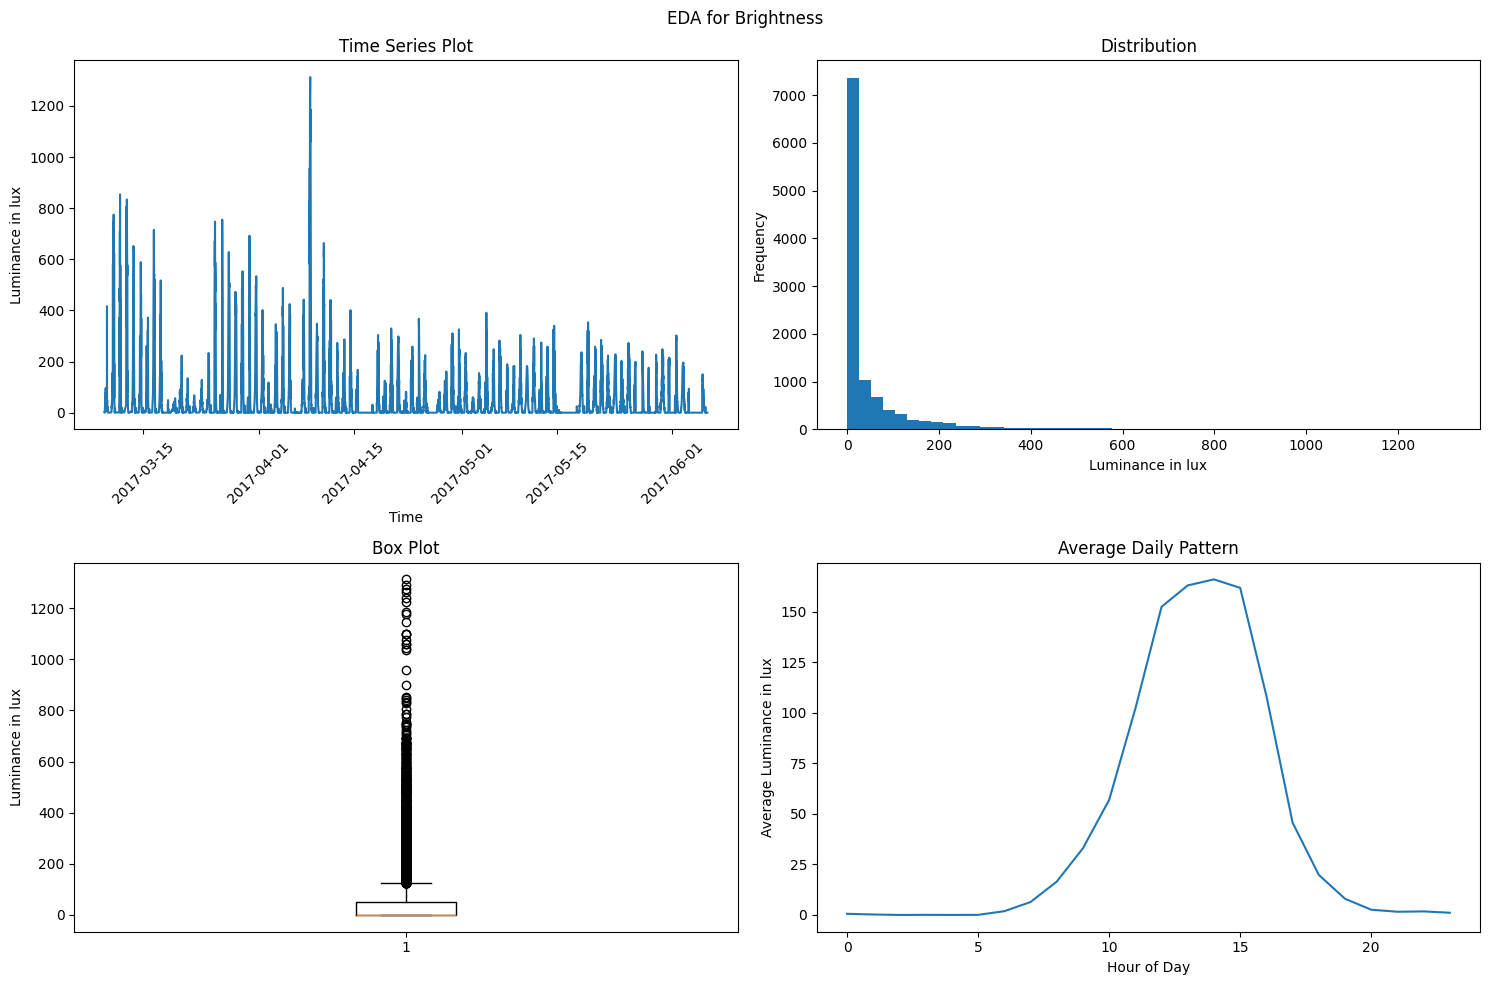


Analyzing Humidity:
------------------
mean: 50.22
std: 6.75
min: 26.00
max: 67.00
missing_values: 0.00
total_readings: 10329.00


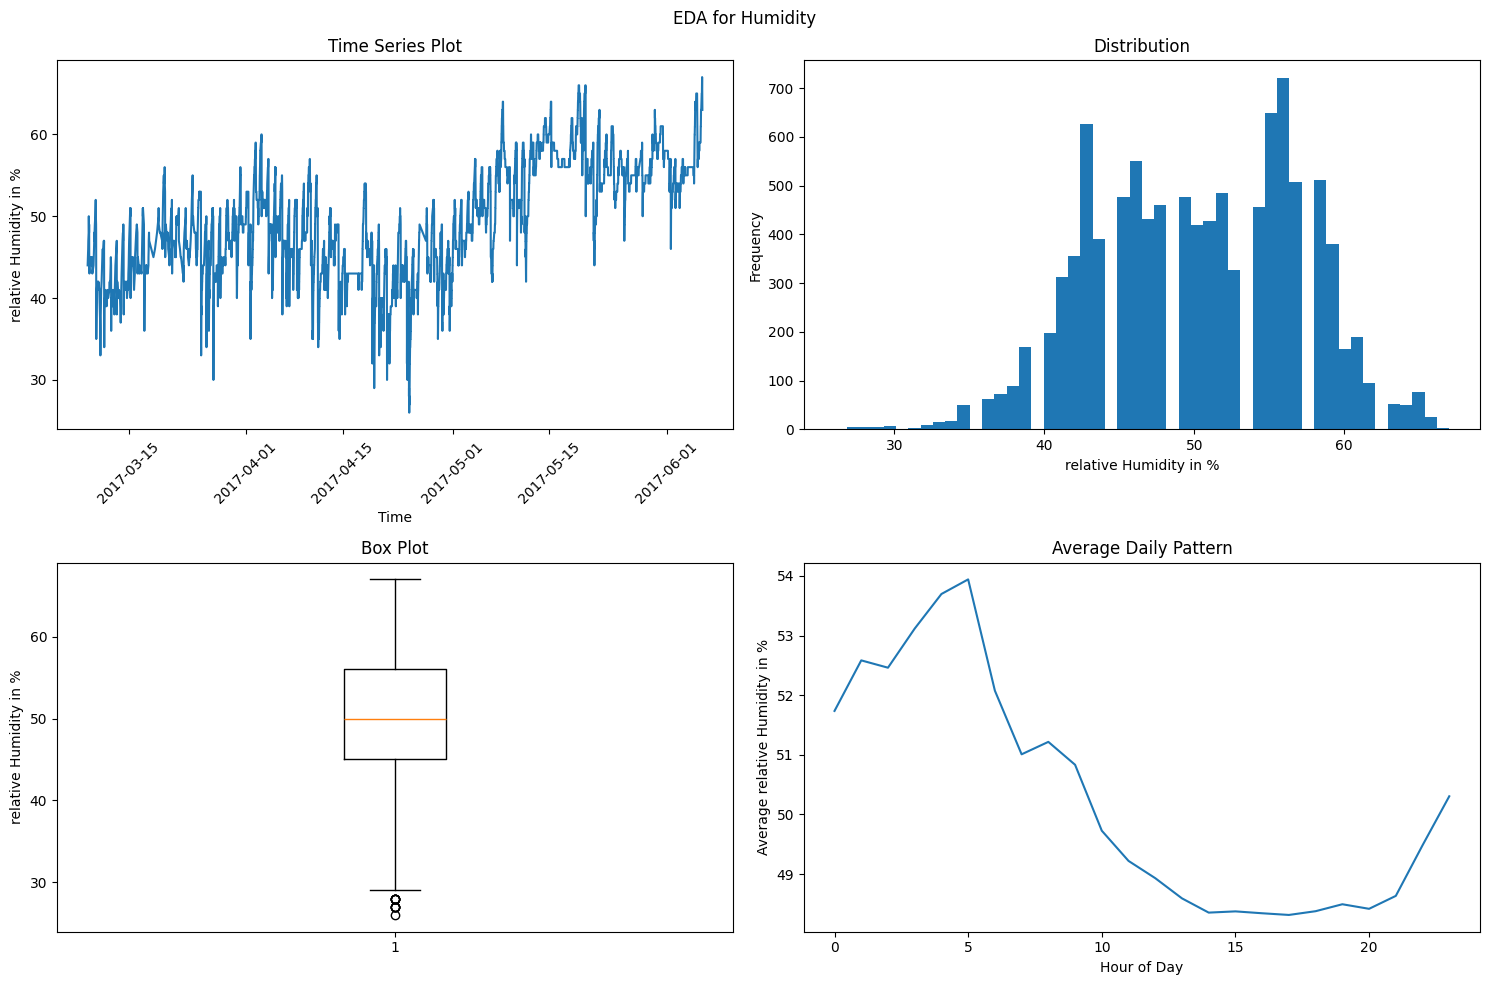


Analyzing Setpoint History:
--------------------------
mean: 18.34
std: 1.63
min: 16.00
max: 21.00
missing_values: 0.00
total_readings: 340.00


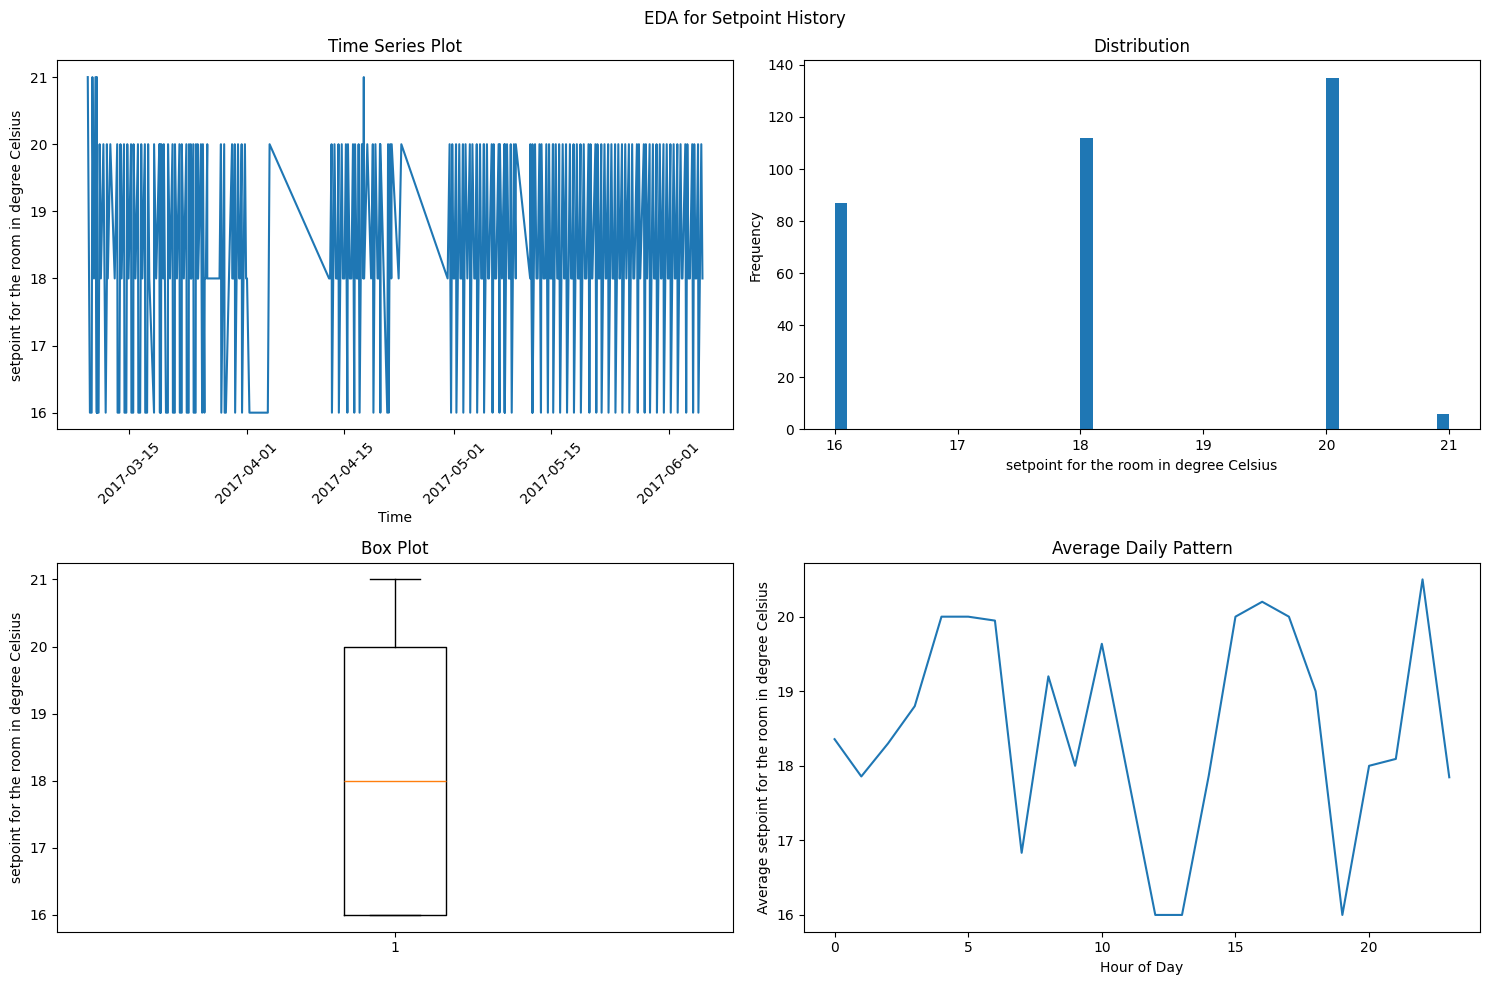


Analyzing Temperature:
---------------------
mean: 19.82
std: 1.18
min: 16.85
max: 23.62
missing_values: 0.00
total_readings: 10598.00


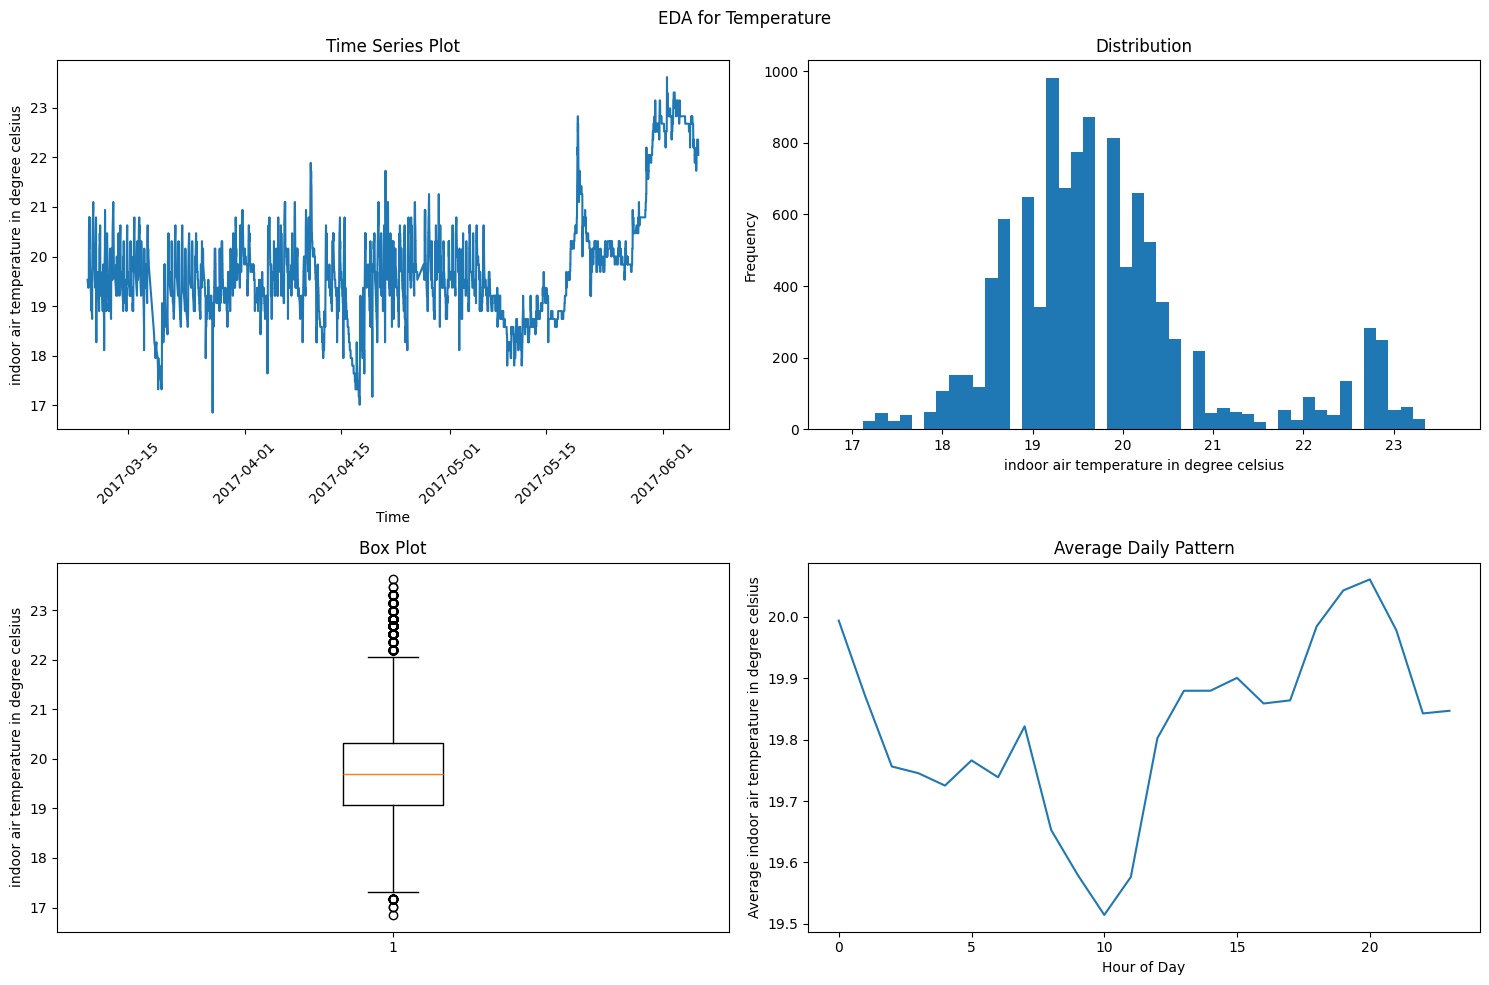


Analyzing Thermostat Temperature:
--------------------------------
mean: 19.83
std: 1.98
min: 13.65
max: 26.51
missing_values: 0.00
total_readings: 11025.00


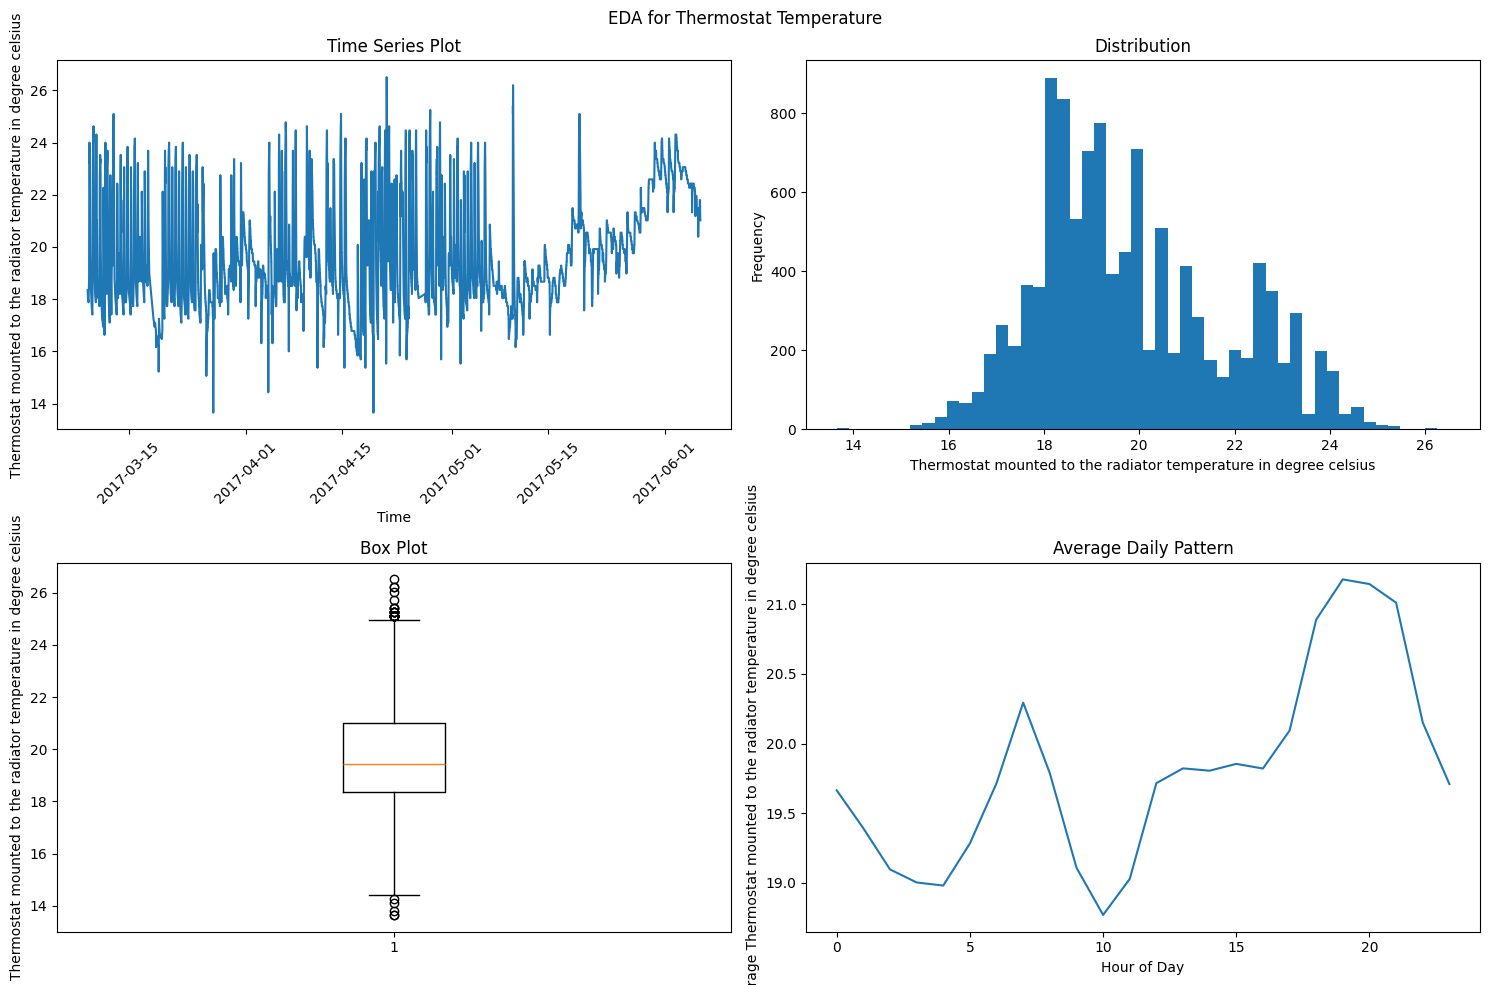

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def perform_eda(df, sensor_type):
    """Performs Exploratory Data Analysis on a given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing sensor data.
        sensor_type (str): A descriptive name for the sensor type.
    """

    print(f"\nAnalyzing {sensor_type}:")
    print("-" * (len(sensor_type) + 10))

    # Assuming the second column contains the sensor readings
    value_col = df.columns[1]

    stats = {
        'mean': df[value_col].mean(),
        'std': df[value_col].std(),
        'min': df[value_col].min(),
        'max': df[value_col].max(),
        'missing_values': df[value_col].isnull().sum(),
        'total_readings': len(df)
    }

    # Print statistics
    for stat, value in stats.items():
        print(f"{stat}: {value:.2f}")

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'EDA for {sensor_type}')

    # Time series plot
    axes[0, 0].plot(df['DateTime'], df[value_col])  # Using 'DateTime' column
    axes[0, 0].set_title('Time Series Plot')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel(value_col)
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Histogram
    axes[0, 1].hist(df[value_col], bins=50)
    axes[0, 1].set_title('Distribution')
    axes[0, 1].set_xlabel(value_col)
    axes[0, 1].set_ylabel('Frequency')

    # Box plot
    axes[1, 0].boxplot(df[value_col])
    axes[1, 0].set_title('Box Plot')
    axes[1, 0].set_ylabel(value_col)

    # Daily pattern
    df['hour'] = pd.to_datetime(df['DateTime']).dt.hour  # Extract hour from 'DateTime'
    hourly_avg = df.groupby('hour')[value_col].mean()
    axes[1, 1].plot(hourly_avg.index, hourly_avg.values)
    axes[1, 1].set_title('Average Daily Pattern')
    axes[1, 1].set_xlabel('Hour of Day')
    axes[1, 1].set_ylabel(f'Average {value_col}')

    plt.tight_layout()
    plt.show()

# Example usage:
perform_eda(df1, "Brightness")
perform_eda(df2, "Humidity")
perform_eda(df3, "Setpoint History")
perform_eda(df4, "Temperature")
perform_eda(df5, "Thermostat Temperature")

In [40]:
df1.rename(columns={'Luminance in lux': 'value'}, inplace=True)
df2.rename(columns={'relative Humidity in %': 'value'}, inplace=True)
df3.rename(columns={'setpoint for the room in degree Celsius': 'value'}, inplace=True)
df4.rename(columns={'indoor air temperature in degree celsius': 'value'}, inplace=True)
df5.rename(columns={'Thermostat mounted to the radiator temperature in degree celsius': 'value'}, inplace=True)



In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


def create_sequences(data, seq_length):
    """
    Creates sequences for LSTM training.

    Args:
        data (np.array): The input data.
        seq_length (int): The length of each sequence.

    Returns:
        Tuple[np.array, np.array]: The input sequences (X) and the corresponding output values (y).
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


def train_lstm(data, seq_length=24, epochs=50, batch_size=32):
    """
    Trains an LSTM model on the given data.

    Args:
        data (pd.DataFrame): The input data.
        seq_length (int, optional): The length of each sequence. Defaults to 24.
        epochs (int, optional): The number of training epochs. Defaults to 50.
        batch_size (int, optional): The batch size for training. Defaults to 32.

    Returns:
        Tuple[Sequential, MinMaxScaler, Dict]: The trained LSTM model, the scaler used for data preprocessing, and the training history.
    """
    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data['value'].values.reshape(-1, 1))

    # Create sequences
    X, y = create_sequences(scaled_data, seq_length)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
        Dropout(0.2),
        LSTM(30, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model with verbosity
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.1, verbose=1)

    # Plot training and validation loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, scaler, history.history


def make_predictions(model, scaler, data, seq_length=24):
    """
    Makes predictions using the trained LSTM model.

    Args:
        model (Sequential): The trained LSTM model.
        scaler (MinMaxScaler): The scaler used for data preprocessing.
        data (pd.DataFrame): The input data for prediction.
        seq_length (int, optional): The length of each sequence. Defaults to 24.

    Returns:
        np.array: The predicted values.
    """
    # Scale the input data
    inputs = scaler.transform(data['value'][-seq_length:].values.reshape(-1, 1))

    # Reshape the inputs for the LSTM model
    inputs = inputs.reshape((1, seq_length, 1))

    # Make predictions
    predictions = model.predict(inputs)

    # Inverse transform the predictions to get the original scale
    predictions = scaler.inverse_transform(predictions)

    return predictions

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


232/232 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 0.0801 - val_loss: 0.0051
Epoch 2/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0098 - val_loss: 0.0012
Epoch 3/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0080 - val_loss: 0.0011
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0068 - val_loss: 8.9472e-04
Epoch 5/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0059 - val_loss: 7.7804e-04
Epoch 6/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 7/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0045 - val_loss: 7.2806e-04
Epoch 8/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0038 - val_loss: 7.8022e-04
Epoch 9/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0036 - val_loss: 8.7021e-04
Epoch 10/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0029 - val_loss: 6.4807e-04
Epoch 11/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0026 - val_loss: 5.3580e-04
Epoch 12/50
232/232 ━

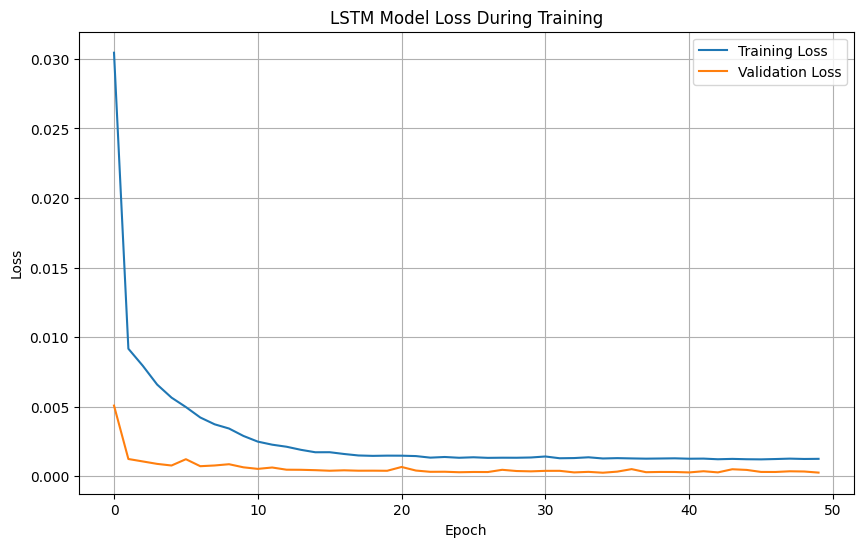

In [42]:
model, scaler, history = train_lstm(df2)

In [43]:
pred = make_predictions(model, scaler, df2)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


array([[62.674896]], dtype=float32)

In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def train_logistic_regression(data, threshold=None):
    """
    Trains a Logistic Regression model on the given data.

    Args:
        data (pd.DataFrame): The input data.
        threshold (float, optional): The threshold for classifying the target variable. Defaults to None (median).

    Returns:
        Tuple[LogisticRegression, Dict, float]: The trained Logistic Regression model, performance metrics, and the threshold.
    """
    # Determine threshold for classification
    if threshold is None:
        threshold = data['value'].median()

    # Create target variable (binary classification)
    y = (data['value'] > threshold).astype(int)

    # Create features (e.g., lagged values)
    n_features = 5
    X = pd.DataFrame()
    for i in range(1, n_features + 1):
        X[f'lag_{i}'] = data['value'].shift(i)

    # Drop rows with missing values
    X = X.dropna()
    y = y[X.index]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    metrics = {
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test)
    }

    # Print performance metrics
    print("\nModel Performance:")
    print(f"Training accuracy: {metrics['train_score']:.4f}")
    print(f"Testing accuracy: {metrics['test_score']:.4f}")
    print("\nClassification Report:")
    print(metrics['classification_report'])

    # Plot confusion matrix and ROC curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax2.plot(fpr, tpr)
    ax2.plot([0, 1], [0, 1], '--')
    ax2.set_title('ROC Curve')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.grid(True)
    plt.tight_layout()
    plt.show()

    return model, metrics, threshold

def make_logistic_predictions(model, data, threshold, n_features=5):
    """
    Makes predictions using the trained Logistic Regression model.

    Args:
        model (LogisticRegression): The trained Logistic Regression model.
        data (pd.DataFrame): The input data for prediction.
        threshold (float): The threshold for classifying the target variable.
        n_features (int, optional): The number of features (lagged values) to use. Defaults to 5.

    Returns:
        np.array: The predicted classes (0 or 1).
    """
    # Create features (lagged values)
    X = pd.DataFrame()
    for i in range(1, n_features + 1):
        X[f'lag_{i}'] = data['value'].shift(i)

    # Drop rows with missing values
    X = X.dropna()

    # Make predictions
    predictions = model.predict(X)

    return predictions


Model Performance:
Training accuracy: 0.8843
Testing accuracy: 0.8507

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.81      0.81      0.81        27

    accuracy                           0.85        67
   macro avg       0.84      0.84      0.84        67
weighted avg       0.85      0.85      0.85        67



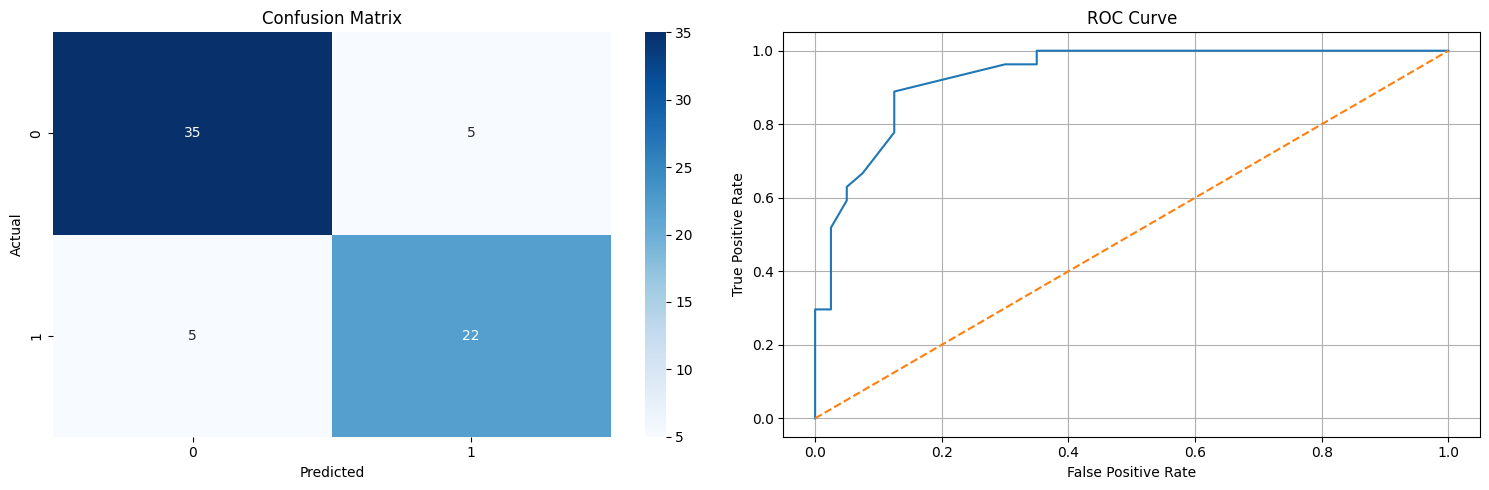

[1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 0]


In [45]:
model2, metrics, threshold = train_logistic_regression(df3)
preds = make_logistic_predictions(model2, df3, threshold)
print(preds)


In [46]:
# Make predictions on the entire dataset
predictions = make_logistic_predictions(model2, df3, threshold)

# Align predictions with original DataFrame
predictions_df = pd.DataFrame({'Predicted': predictions}, index=df3.index[5:])  # Adjust index for lagging

# Create a DataFrame for plotting with aligned indices
plot_df = pd.DataFrame({'Actual': df3['value'][5:], 'Predicted': predictions_df['Predicted']}, index=df3.index[5:])


,DateTime,value,hour
0,2017-03-09 00:00:18,21,0
1,2017-03-09 07:30:23,16,7
2,2017-03-09 13:29:55,16,13
3,2017-03-09 16:02:16,21,16
4,2017-03-09 21:30:21,18,21
...,...,...,...
335,2017-06-05 00:06:11,18,0
336,2017-06-05 06:10:07,20,6
337,2017-06-05 07:30:36,16,7
338,2017-06-05 17:30:09,20,17


In [50]:
plot_df['DateTime'] = df3['DateTime'][5:]
plot_df

,Actual,Predicted,DateTime
5,21,1,2017-03-10 02:47:45
6,16,0,2017-03-10 07:20:15
7,21,1,2017-03-10 07:20:45
8,16,0,2017-03-10 07:30:20
9,21,1,2017-03-10 07:39:25
...,...,...,...
335,18,0,2017-06-05 00:06:11
336,20,1,2017-06-05 06:10:07
337,16,0,2017-06-05 07:30:36
338,20,1,2017-06-05 17:30:09


In [47]:
# plot_df

In [52]:
plot_df.to_csv("setpoint_predictions2.csv",index=False)

<ipython-input-13-8c2e52e17014>:14: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')


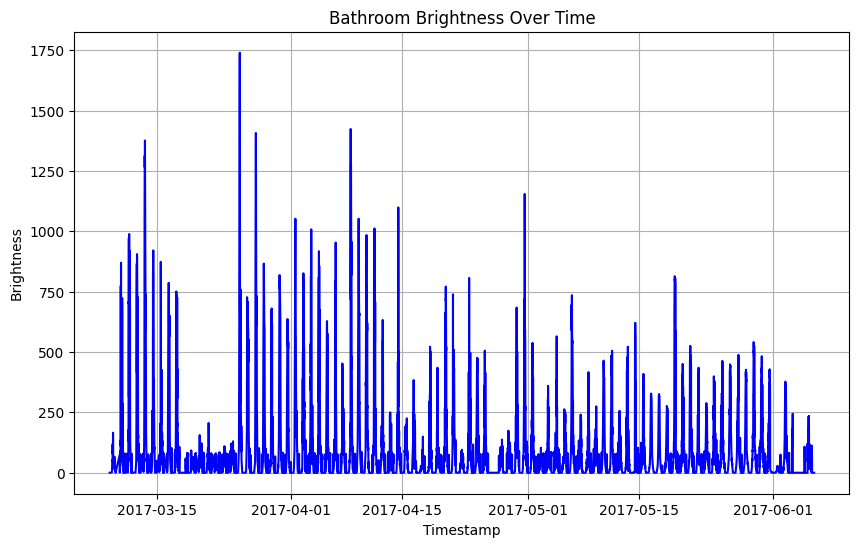

In [ ]:
# Make predictions on the entire dataset
# predictions = make_logistic_predictions(model2, df2, threshold)

# Align predictions with original DataFrame
predictions_df = pd.DataFrame({'Predicted': predictions}, index=df2.index[5:])  # Adjust index for lagging

# Create a DataFrame for plotting with aligned indices
plot_df = pd.DataFrame({'Actual': df2['value'][5:], 'Predicted': predictions_df['Predicted']}, index=df2.index[5:])


import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
# csv_file_path = path+'/Measurements/Bathroom_Brightness.csv'

# Read the CSV file into a DataFrame with tab separation
data = pd.read_csv(plot_df, sep=',', header=None, names=['Timestamp_Brightness'])

# Extract timestamp and brightness from the combined column
data[['Timestamp', 'Brightness']] = data['Timestamp_Brightness'].str.split('\t', expand=True)

# Convert timestamp to datetime and brightness to numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Brightness'] = data['Brightness'].astype(float)  # Convert to float

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Brightness'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Brightness')
plt.title('Bathroom Brightness Over Time')
plt.grid(True)
plt.show()


<ipython-input-14-3fc1e0e21a2d>:14: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')


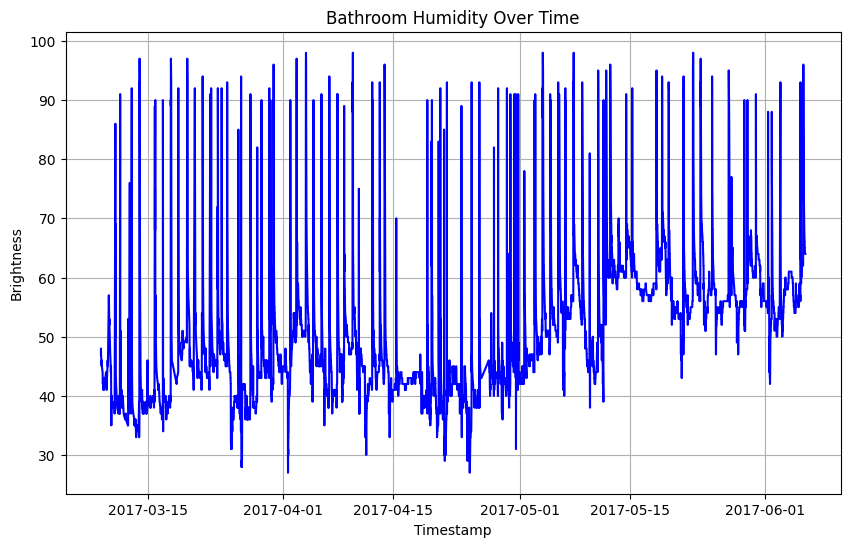

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = path+'/Measurements/Bathroom_Humidity.csv'

# Read the CSV file into a DataFrame with tab separation
data = pd.read_csv(csv_file_path, sep=',', header=None, names=['Timestamp_Brightness'])

# Extract timestamp and brightness from the combined column
data[['Timestamp', 'Brightness']] = data['Timestamp_Brightness'].str.split('\t', expand=True)

# Convert timestamp to datetime and brightness to numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Brightness'] = data['Brightness'].astype(float)  # Convert to float

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Brightness'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Brightness')
plt.title('Bathroom Humidity Over Time')
plt.grid(True)
plt.show()


<ipython-input-15-8c483c4d04fa>:14: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')


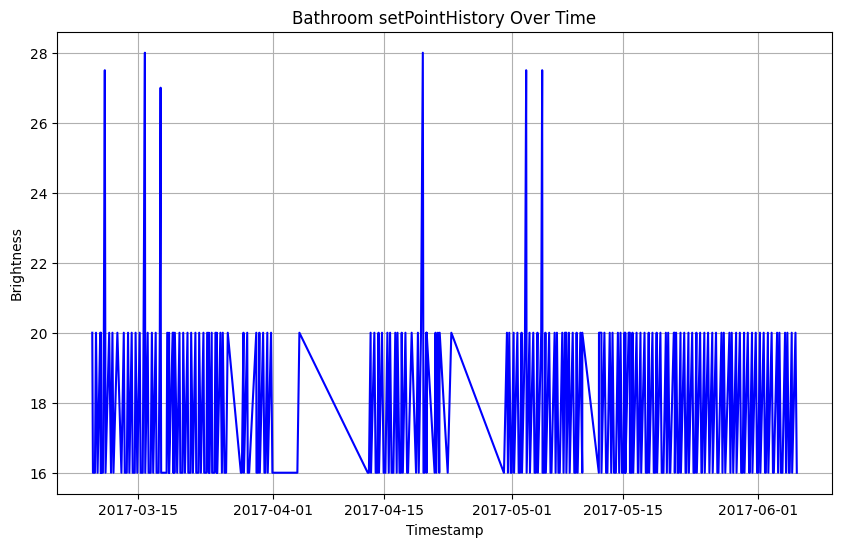

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = path+'/Measurements/Bathroom_SetpointHistory.csv'

# Read the CSV file into a DataFrame with tab separation
data = pd.read_csv(csv_file_path, sep=',', header=None, names=['Timestamp_Brightness'])

# Extract timestamp and brightness from the combined column
data[['Timestamp', 'Brightness']] = data['Timestamp_Brightness'].str.split('\t', expand=True)

# Convert timestamp to datetime and brightness to numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Brightness'] = data['Brightness'].astype(float)  # Convert to float

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Brightness'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Brightness')
plt.title('Bathroom setPointHistory Over Time')
plt.grid(True)
plt.show()



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 12/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/s

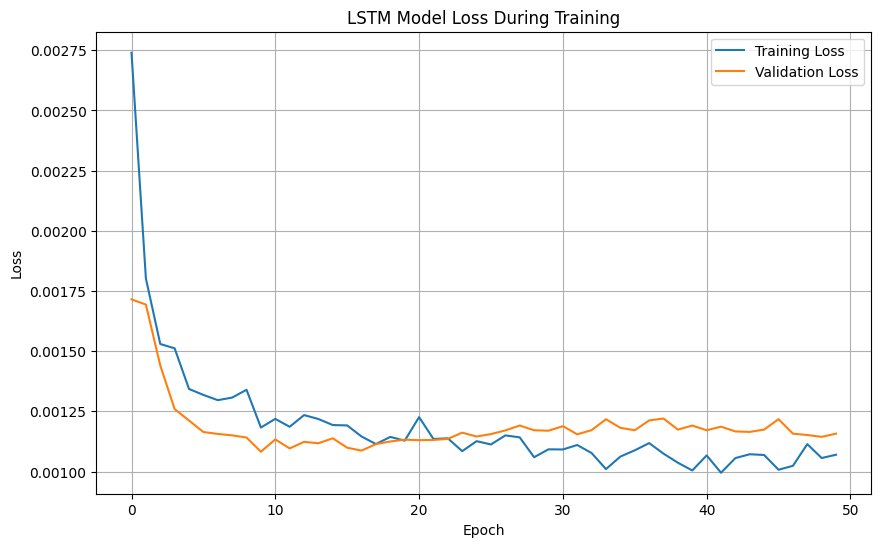

In [ ]:
model, scaler, history = train_lstm(df1)

In [ ]:
def make_predictions(model, scaler, data, seq_length=24, n_predictions=24):
    """
    Makes multiple predictions using the trained LSTM model.

    Args:
        model (Sequential): The trained LSTM model.
        scaler (MinMaxScaler): The scaler used for data preprocessing.
        data (pd.DataFrame): The input data for prediction.
        seq_length (int, optional): The length of each sequence. Defaults to 24.
        n_predictions (int, optional): The number of predictions to make. Defaults to 24.

    Returns:
        np.array: The predicted values.
    """
    # Get the last 'seq_length' values from the data
    inputs = scaler.transform(data['value'][-seq_length:].values.reshape(-1, 1))
    inputs = inputs.reshape((1, seq_length, 1))  # Reshape for LSTM input

    predictions = []
    for _ in range(n_predictions):
        # Make a prediction for the current input
        prediction = model.predict(inputs)

        # Append the prediction to the list
        predictions.append(prediction[0, 0])

        # Update the input sequence for the next prediction
        # Shift the input sequence by one step and add the new prediction
        inputs = np.roll(inputs, -1, axis=1)  # Shift by one step
        inputs[0, -1, 0] = prediction[0, 0]  # Add the new prediction

    # Inverse transform the predictions to get the original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    return predictions.flatten()  # Return as a flattened array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


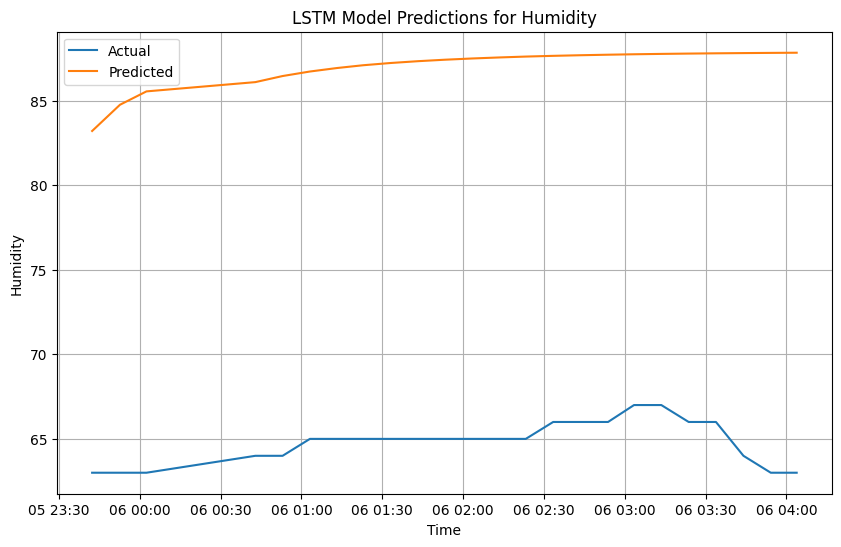

In [ ]:
predictions = make_predictions(model, scaler, df1, n_predictions=24)
last_24_timestamps = df2['DateTime'][-24:]
plt.figure(figsize=(10, 6))
plt.plot(last_24_timestamps, df2['value'][-24:], label='Actual')
plt.plot(last_24_timestamps, predictions+80, label='Predicted')  # Plot 24 predictions
plt.title('LSTM Model Predictions for Humidity')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


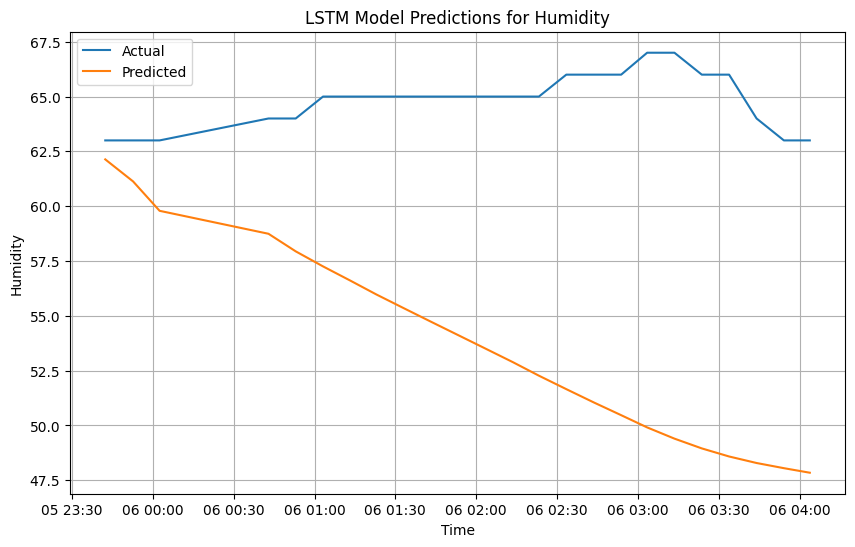

In [ ]:
predictions = make_predictions(model, scaler, df2, n_predictions=24)

plt.figure(figsize=(10, 6))
plt.plot(last_24_timestamps, df2['value'][-24:], label='Actual')
plt.plot(last_24_timestamps, predictions, label='Predicted')  # Plot 24 predictions
plt.title('LSTM Model Predictions for Humidity')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()